# **言語処理学会主催（30周年記念特別編）**
# **言語処理技術セミナー2024**
# **「言語分析のための言語処理・深層学習」**
# **応用1：word2vecベースの言語分析**
## 2024年8月30日（金）
## 甲南大学ネットワークキャンパス東京
## 担当：川崎義史（東京大学）

# word2vecの使い方
- gensimライブラリを使ってword2vecを使ってみよう。

## データ読み込み
- 50次元のgloveモデルを使ってみよう。


In [ ]:
# gensimをインストール（初回のみ）
!pip install gensim

# gensimをインポート
import gensim

# numpyをnpとしてインポート
import numpy as np

In [2]:
# gensim.downloaderをインポート
import gensim.downloader

# 50次元のgloveモデルを読み込み（1分程度かかります）
model = gensim.downloader.load('glove-wiki-gigaword-50')

[==================================================] 100.0% 66.0/66.0MB downloaded


In [3]:
# 全ベクトル確認
model.vectors

array([[ 0.418   ,  0.24968 , -0.41242 , ..., -0.18411 , -0.11514 ,
        -0.78581 ],
       [ 0.013441,  0.23682 , -0.16899 , ..., -0.56657 ,  0.044691,
         0.30392 ],
       [ 0.15164 ,  0.30177 , -0.16763 , ..., -0.35652 ,  0.016413,
         0.10216 ],
       ...,
       [-0.51181 ,  0.058706,  1.0913  , ..., -0.25003 , -1.125   ,
         1.5863  ],
       [-0.75898 , -0.47426 ,  0.4737  , ...,  0.78954 , -0.014116,
         0.6448  ],
       [ 0.072617, -0.51393 ,  0.4728  , ..., -0.18907 , -0.59021 ,
         0.55559 ]], dtype=float32)

In [4]:
# サイズ確認
# 50次元の単語ベクトルが40万語分格納されている
model.vectors.shape

(400000, 50)

In [5]:
# 単語リストの最初の30個
model.index_to_key[:30]

['the',
 ',',
 '.',
 'of',
 'to',
 'and',
 'in',
 'a',
 '"',
 "'s",
 'for',
 '-',
 'that',
 'on',
 'is',
 'was',
 'said',
 'with',
 'he',
 'as',
 'it',
 'by',
 'at',
 '(',
 ')',
 'from',
 'his',
 "''",
 '``',
 'an']

In [6]:
# appleの単語ベクトル
x = model['apple']
x

array([ 0.52042 , -0.8314  ,  0.49961 ,  1.2893  ,  0.1151  ,  0.057521,
       -1.3753  , -0.97313 ,  0.18346 ,  0.47672 , -0.15112 ,  0.35532 ,
        0.25912 , -0.77857 ,  0.52181 ,  0.47695 , -1.4251  ,  0.858   ,
        0.59821 , -1.0903  ,  0.33574 , -0.60891 ,  0.41742 ,  0.21569 ,
       -0.07417 , -0.5822  , -0.4502  ,  0.17253 ,  0.16448 , -0.38413 ,
        2.3283  , -0.66682 , -0.58181 ,  0.74389 ,  0.095015, -0.47865 ,
       -0.84591 ,  0.38704 ,  0.23693 , -1.5523  ,  0.64802 , -0.16521 ,
       -1.4719  , -0.16224 ,  0.79857 ,  0.97391 ,  0.40027 , -0.21912 ,
       -0.30938 ,  0.26581 ], dtype=float32)

In [7]:
# 単語ベクトルの次元
x.shape

(50,)

In [8]:
# 単語ベクトルの長さ（ノルム）
np.linalg.norm(x)

5.2923646

## t-SNEによる次元圧縮
- 単語ベクトルを50次元から2次元に圧縮して可視化してみよう。

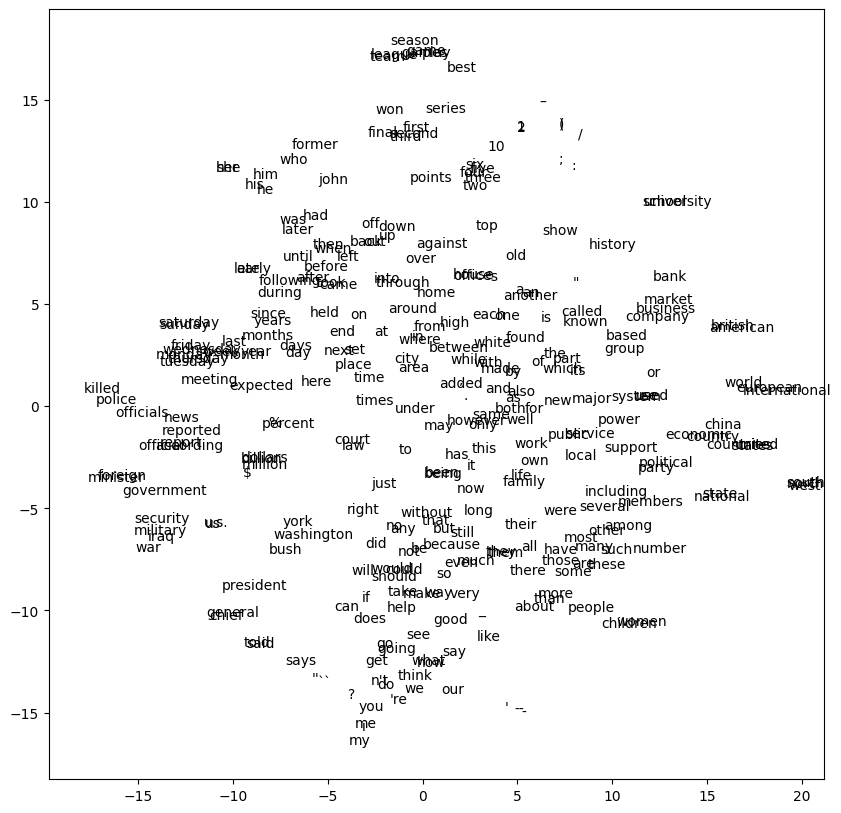

In [9]:
# matplotlib.pyplotをpltとしてインポート
import matplotlib.pyplot as plt

# TSNEをインポート
from sklearn.manifold import TSNE

# データが大きいので，最初のn個のデータのみを使用
n = 300 # データ数
X = model.vectors[:n] # 単語ベクトル
labels = model.index_to_key[:n] # 単語ラベル

# t-SNEで，50次元のベクトルを2次元に圧縮
tsne = TSNE(n_components=2, random_state=0) # random_state=0で乱数シードを固定
X_embedded = tsne.fit_transform(X) # 圧縮

# プロット
plt.figure(figsize=(10, 10)) # 描画準備
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], marker='') # マーカーなしで散布図を描画

# 単語ラベルを表示
for i in range(n):
  plt.text(X_embedded[i, 0], X_embedded[i, 1], labels[i])

plt.show()

## 類似単語検索
- コサイン類似度に基づいて類似単語を検索してみよう。
- 単語は全て小文字に変換済みです。

In [10]:
# appleの単数形＝IT企業
model.most_similar('apple', topn=10)

[('blackberry', 0.7543067336082458),
 ('chips', 0.7438644170761108),
 ('iphone', 0.7429664134979248),
 ('microsoft', 0.7334205508232117),
 ('ipad', 0.7331036329269409),
 ('pc', 0.7217225432395935),
 ('ipod', 0.7199784517288208),
 ('intel', 0.7192243337631226),
 ('ibm', 0.7146540284156799),
 ('software', 0.7093585133552551)]

In [11]:
# applesの複数形＝果物
model.most_similar('apples', topn=10)

[('peaches', 0.8623535633087158),
 ('oranges', 0.8594476580619812),
 ('cherries', 0.8461860418319702),
 ('mangoes', 0.8264981508255005),
 ('apricots', 0.8242633938789368),
 ('strawberries', 0.8229067921638489),
 ('potatoes', 0.8179376125335693),
 ('melons', 0.7980057597160339),
 ('berries', 0.794605016708374),
 ('vegetables', 0.792052149772644)]

In [12]:
# paella
model.most_similar('paella', topn=10)

[('risotto', 0.7513157725334167),
 ('lasagna', 0.746839165687561),
 ('bouillabaisse', 0.7264416813850403),
 ('polenta', 0.7242710590362549),
 ('gazpacho', 0.720428466796875),
 ('pasta', 0.712557315826416),
 ('souffle', 0.7090212106704712),
 ('antipasto', 0.7083943486213684),
 ('tapas', 0.6925298571586609),
 ('gumbo', 0.6914083957672119)]

In [13]:
# ichiro
model.most_similar('ichiro', topn=10)

[('ozawa', 0.758977472782135),
 ('ryzhkov', 0.7529011964797974),
 ('aisawa', 0.7358683347702026),
 ('matsui', 0.7304610013961792),
 ('kenji', 0.7260814309120178),
 ('kazuo', 0.7090587019920349),
 ('girardi', 0.6944605708122253),
 ('suzuki', 0.6801451444625854),
 ('edgardo', 0.6776404976844788),
 ('hideki', 0.6617801785469055)]

In [14]:
# biden
model.most_similar('biden', topn=10)

[('gephardt', 0.8401312828063965),
 ('cheney', 0.8309441208839417),
 ('rodham', 0.8121967315673828),
 ('pelosi', 0.8114649653434753),
 ('obama', 0.809582531452179),
 ('barack', 0.8082160353660583),
 ('dole', 0.8043028116226196),
 ('lieberman', 0.8020787835121155),
 ('hillary', 0.7988161444664001),
 ('senator', 0.798692524433136)]

In [15]:
# trump
model.most_similar('trump', topn=10)

[('casino', 0.6813156604766846),
 ('nows', 0.6659913659095764),
 ('casinos', 0.6434264779090881),
 ('hilton', 0.6420213580131531),
 ('mogul', 0.6340301036834717),
 ('vegas', 0.6171435117721558),
 ('itt', 0.594638466835022),
 ('westin', 0.5835393667221069),
 ('hyatt', 0.5815166234970093),
 ('diller', 0.5665310025215149)]

In [16]:
# a
model.most_similar('a', topn=10)

[('another', 0.9505615234375),
 ('an', 0.9489638805389404),
 ('one', 0.9007352590560913),
 ('same', 0.8671455979347229),
 ('the', 0.8517429232597351),
 ('comes', 0.8462116122245789),
 ('is', 0.8455259203910828),
 ('whose', 0.8421803712844849),
 ('this', 0.8399912714958191),
 ('as', 0.8371177911758423)]

In [17]:
# could
model.most_similar('could', topn=10)

[('might', 0.9671579599380493),
 ('would', 0.9603726863861084),
 ('because', 0.9472366571426392),
 ('if', 0.943134605884552),
 ('not', 0.9373372197151184),
 ('take', 0.9236993789672852),
 ('should', 0.9233610033988953),
 ('come', 0.9227427840232849),
 ('but', 0.9226049184799194),
 ('even', 0.9175540208816528)]

In [ ]:
# 気になる単語を調べてみよう！
model.most_similar('', topn=10)

In [ ]:
# 気になる単語を調べてみよう！
model.most_similar('', topn=10)

## 類推
- 単語ベクトルの足し算・引き算で意味の計算をしてみよう。

In [18]:
# king – man + women = ?
x = model['king'] - model['man'] + model['woman'] # ベクトルの長さを正規化せずに計算
model.most_similar(x, topn=10)

[('king', 0.8859834671020508),
 ('queen', 0.8609582185745239),
 ('daughter', 0.7684512734413147),
 ('prince', 0.7640699744224548),
 ('throne', 0.7634970545768738),
 ('princess', 0.7512729167938232),
 ('elizabeth', 0.7506489157676697),
 ('father', 0.7314497232437134),
 ('kingdom', 0.7296158671379089),
 ('mother', 0.728001058101654)]

In [19]:
# king – man + women = ?
model.most_similar(positive=['king', 'woman'], negative=['man']) # ベクトルの長さを正規化した上で計算

[('queen', 0.8523604273796082),
 ('throne', 0.7664334177970886),
 ('prince', 0.7592144012451172),
 ('daughter', 0.7473883628845215),
 ('elizabeth', 0.7460219860076904),
 ('princess', 0.7424570322036743),
 ('kingdom', 0.7337412238121033),
 ('monarch', 0.721449077129364),
 ('eldest', 0.7184861898422241),
 ('widow', 0.7099431157112122)]

In [20]:
# tokyo – japan + spain = ?
model.most_similar(positive=['tokyo', 'spain'], negative=['japan'])

[('madrid', 0.8346265554428101),
 ('aires', 0.8295309543609619),
 ('buenos', 0.8198583126068115),
 ('santiago', 0.7818863987922668),
 ('paris', 0.7628700137138367),
 ('caracas', 0.7536874413490295),
 ('milan', 0.7500485777854919),
 ('sao', 0.7444894313812256),
 ('valencia', 0.7351594567298889),
 ('lisbon', 0.722726047039032)]

In [21]:
# summer – hot + cold = ?
model.most_similar(positive=['summer', 'cold'], negative=['hot'])

[('winter', 0.8243834972381592),
 ('during', 0.7977467775344849),
 ('beginning', 0.778415322303772),
 ('spring', 0.7712658643722534),
 ('autumn', 0.7544248104095459),
 ('war', 0.7430115342140198),
 ('since', 0.732937216758728),
 ('years', 0.7281008362770081),
 ('decade', 0.7250821590423584),
 ('days', 0.7241210341453552)]

In [22]:
# dogs – dog + cat = ?
model.most_similar(positive=['dogs', 'cat'], negative=['dog'])

[('cats', 0.9023850560188293),
 ('rats', 0.8294457793235779),
 ('animals', 0.8152007460594177),
 ('snakes', 0.7855987548828125),
 ('rabbits', 0.7810242772102356),
 ('pigs', 0.7778130173683167),
 ('pets', 0.765869677066803),
 ('birds', 0.7560611963272095),
 ('monkeys', 0.7489490509033203),
 ('elephants', 0.7420347332954407)]

In [ ]:
# アナロジータスクを考えてみよう
model.most_similar(positive=['', ''], negative=[''])

In [ ]:
# アナロジータスクを考えてみよう
model.most_similar(positive=['', ''], negative=[''])


# word2vecの学習
- 小さめのコーパスを使って，実際にword2vecの学習をしてみよう。

In [23]:
# nltkをインポート
import nltk

# nltkからgutenbergコーパスをダウンロード
nltk.download('gutenberg')

# nltkからトークナイザpunktをダウンロード
nltk.download('punkt')

# gutenbergをcorpusとしてインポート
from nltk.corpus import gutenberg as corpus

# コーパスを読み込み
sentences = corpus.sents(corpus.fileids())

# 最初の10000文をスライス
sentences = sentences[:10000]

# 最初の10件を表示
for sentence in sentences[:10]:
  print(sentence)

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']']
['VOLUME', 'I']
['CHAPTER', 'I']
['Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty', '-', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.']
['She', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate', ',', 'indulgent', 'father', ';', 'and', 'had', ',', 'in', 'consequence', 'of', 'her', 'sister', "'", 's', 'marriage', ',', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period', '.']
['Her', 'mother', 'had', 'died', 'too', 'long', 'ago', 'for', 'her', 'to', 'have', 'more', 'than', 'an', 'indistinct', 'remembrance', 'of', 'her', 'caresses', ';', 'and', 'her', 'place', 'had', 'been', 'supp

In [24]:
# gensim.modelsからWord2VecとKeyedVectorsをインポート
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

# 100次元の単語ベクトルを学習
model = Word2Vec(sentences, vector_size=100)

# 学習済み単語ベクトルをテキストファイルとして保存
model.wv.save_word2vec_format(f'word2vec_test.txt')

In [25]:
# ドライブをマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
# 学習済み単語ベクトルを読み込み
model = KeyedVectors.load_word2vec_format(f'word2vec_test.txt')

In [28]:
# 全ベクトル確認
model.vectors

array([[ 7.7955589e-02,  5.8776850e-01,  7.3673135e-01, ...,
        -4.3132928e-01, -2.5974691e-01, -4.2303714e-01],
       [ 1.5435496e-01,  4.1041508e-01,  6.6994321e-01, ...,
        -4.8306370e-01, -2.7551803e-01, -4.5754027e-01],
       [-7.3981375e-01, -1.3421412e-01, -1.6169542e-01, ...,
        -5.1216257e-01, -1.3599423e-01, -7.2931439e-01],
       ...,
       [-6.1387639e-02, -1.3250543e-04, -1.6473858e-02, ...,
        -5.3480152e-02, -6.1255977e-03, -4.2148318e-02],
       [-3.8656056e-02,  2.1283774e-02,  8.8656666e-03, ...,
        -7.0638411e-02,  9.1448432e-04, -2.6806589e-02],
       [-1.8036056e-02,  2.7324442e-02, -8.7637976e-03, ...,
        -3.5724688e-02, -3.2291540e-03, -6.0086264e-03]], dtype=float32)

In [29]:
# モデルサイズ確認
# 100次元の単語ベクトルが3053語分格納されている
model.vectors.shape

(3053, 100)

In [30]:
# 単語リストの最初の30個
model.index_to_key[:30]

[',',
 '.',
 'the',
 'to',
 'and',
 'of',
 'a',
 'I',
 'was',
 'her',
 ';',
 'in',
 'it',
 'not',
 'be',
 '"',
 'had',
 'she',
 'that',
 'you',
 'as',
 'he',
 'for',
 'have',
 'with',
 'his',
 'but',
 '--',
 'is',
 'very']

In [31]:
# 類似単語検索
model.most_similar('go', topn=10)

[('come', 0.9739564061164856),
 ('speak', 0.968802273273468),
 ('get', 0.9526566863059998),
 ('bear', 0.9448437094688416),
 ('submit', 0.9448361992835999),
 ('call', 0.9419077634811401),
 ('please', 0.9401644468307495),
 ('marry', 0.9391088485717773),
 ('begin', 0.9377005696296692),
 ('afford', 0.9375418424606323)]

In [32]:
# 類似単語検索
model.most_similar('I', topn=10)

[('you', 0.9306491017341614),
 ('we', 0.9227112531661987),
 ('You', 0.8867977261543274),
 ('sure', 0.8842030167579651),
 ('We', 0.8495462536811829),
 ('afraid', 0.8344890475273132),
 ('how', 0.8246755599975586),
 ('what', 0.8181255459785461),
 ('glad', 0.817741334438324),
 ('say', 0.8174133896827698)]

# おまけ：日本語のword2vecモデル
- 簡単に利用可能な日本語のword2vecは重いので，後程，試してみてください。

In [33]:
# fastText（https://fasttext.cc/）と呼ばれるモデルを使用します。
# データが大きいので，読み込みに10分程度かかります。

model = gensim.models.KeyedVectors.load_word2vec_format('https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ja.300.vec.gz', binary=False)

In [34]:
# 類似単語検索
model.most_similar('りんご', topn=10)

[('リンゴ', 0.8323358297348022),
 ('林檎', 0.6918197870254517),
 ('みかん', 0.6908637285232544),
 ('\uf34e', 0.689182698726654),
 ('ストロベ', 0.6018790006637573),
 ('プレザーブ', 0.5951715111732483),
 ('アップルパイ', 0.5803444981575012),
 ('シナノゴールド', 0.5796619653701782),
 ('ぶどう', 0.577567994594574),
 ('ブルーベリー', 0.5758102536201477)]

In [35]:
# 類推
# 王様−男＋女＝？
model.most_similar(positive=['王様', '女'], negative=['男'])

[('女王', 0.4983246922492981),
 ('ラジオキッズ', 0.4979418218135834),
 ('王さま', 0.49087509512901306),
 ('熟', 0.4839142858982086),
 ('王妃', 0.4745190143585205),
 ('アンナ・レオノーウェンズ', 0.4703938066959381),
 ('タプチム', 0.45472589135169983),
 ('ゲムケン', 0.4503451883792877),
 ('裸', 0.4499165415763855),
 ('お姫様', 0.4497036933898926)]